<a href="https://colab.research.google.com/github/Alexander-Schiendorfer/colab-notebooks/blob/master/01_sktime_basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Grundlegende Datenstrukturen für Zeitreihen

Sktime verwendet Pandas-Reihen mit Zeitstempeln als Indizes.

In [ ]:
!pip install sktime
import matplotlib.pyplot as plt
import numpy as np

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.tree import DecisionTreeClassifier
from sktime.classification.interval_based import TimeSeriesForestClassifier
from sktime.classification.distance_based import KNeighborsTimeSeriesClassifier
from sktime.datasets import load_arrow_head
from sktime.series_as_features.compose import FeatureUnion

from sktime.datasets import load_basic_motions

     |████████████████████████████████| 5.7MB 6.6MB/s 
     |████████████████████████████████| 9.5MB 50.3MB/s 
     |████████████████████████████████| 22.3MB 104kB/s 
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [ ]:
from sktime.datasets import load_basic_motions
from sklearn.model_selection import train_test_split

X, y = load_basic_motions(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X.iloc[:, [0]], y)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
labels, counts = np.unique(y_train, return_counts=True)
print(labels, counts)

(60, 1) (60,) (20, 1) (20,)
['badminton' 'running' 'standing' 'walking'] [12 19 13 16]


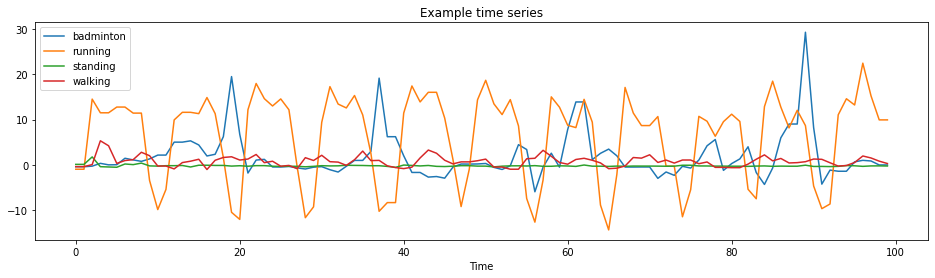

In [ ]:
fig, ax = plt.subplots(1, figsize=plt.figaspect(0.25))
for label in labels:
    X_train.loc[y_train == label, "dim_0"].iloc[0].plot(ax=ax, label=label)
plt.legend()
ax.set(title="Example time series", xlabel="Time");

In [ ]:
X_train.loc[y_train == 'badminton', "dim_0"]

38    0    -0.396060
1    -0.396060
2    -0.268022
3...
39    0      0.901645
1      0.901645
2     -0.05469...
37    0    -0.046089
1    -0.283051
2    -0.587748
3...
36    0    -1.801504
1    -1.801504
2    -0.480725
3...
32    0    -0.179131
1    -0.179131
2     0.461767
3...
32    0     -0.592124
1     -0.592124
2      0.33036...
33    0    -2.488524
1    -2.488524
2    -3.298341
3...
39    0     1.211973
1     1.211973
2    -0.605948
3...
38    0    -2.178746
1    -2.178746
2    -0.448056
3...
34    0      0.052231
1      0.052231
2     -0.54804...
34    0     0.140313
1     0.140313
2     0.903629
3...
36    0      1.686827
1      1.686827
2      0.88247...
Name: dim_0, dtype: object

In [ ]:
import numpy as np
import sklearn.ensemble as ensemble
import sklearn.neighbors as neighbors
import sklearn.gaussian_process as gp
import sklearn.svm as svm
import sklearn.neural_network as nn
from sklearn.metrics import accuracy_score, confusion_matrix
from sktime.classification.shapelet_based import ROCKETClassifier

import time
def readucr(filename):
    data = np.loadtxt(filename, delimiter="\t")
    y = data[:, 0]
    x = data[:, 1:]
    return x, y.astype(int)

root_url = "https://raw.githubusercontent.com/hfawaz/cd-diagram/master/FordA/"

x_train, y_train = readucr(root_url + "FordA_TRAIN.tsv")
x_test, y_test = readucr(root_url + "FordA_TEST.tsv")

y_train[y_train == -1] = 0
y_test[y_test == -1] = 0

all_classifier = [
    ROCKETClassifier(),
    ensemble.RandomForestClassifier(),
    #ensemble.AdaBoostClassifier(),
    ensemble.GradientBoostingClassifier(),
    #ensemble.BaggingClassifier(),
    neighbors.KNeighborsClassifier(),
    #nn.MLPClassifier(),
    #gp.GaussianProcessClassifier(),
    #svm.LinearSVC(max_iter=15000),
    #svm.NuSVC()
    
]

for clf in all_classifier:
    print(f"Starting training of {clf}")
    if isinstance(clf, ROCKETClassifier):
      X_train = np.expand_dims(x_train, axis = 1)
      X_test = np.expand_dims(x_test, axis=1)
    else:
      X_train, X_test = x_train, x_test

    clf.fit(X_train, y_train)


    s = time.time()
    predictions = clf.predict(X_test)
    e = time.time()
    print(f"Inference took {e-s} s.")
    accuracy = accuracy_score(y_test, predictions)
    conf_matrix = confusion_matrix(y_test, predictions)
    print(f"Accuracy of {clf}: {accuracy}")
    print(conf_matrix)

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


Starting training of ROCKETClassifier()
Inference took 64.30484986305237 s.
Accuracy of ROCKETClassifier(): 0.943939393939394
[[647  34]
 [ 40 599]]
Starting training of RandomForestClassifier()
Inference took 0.039370059967041016 s.
Accuracy of RandomForestClassifier(): 0.7318181818181818
[[541 140]
 [214 425]]
Starting training of GradientBoostingClassifier()
Inference took 0.00476837158203125 s.
Accuracy of GradientBoostingClassifier(): 0.6606060606060606
[[503 178]
 [270 369]]
Starting training of KNeighborsClassifier()
Inference took 0.2704479694366455 s.
Accuracy of KNeighborsClassifier(): 0.7196969696969697
[[536 145]
 [225 414]]


In [ ]:
x_train.shape

(3601, 1, 500)